# Importing dependencies

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from tabulate import tabulate
from arch import arch_model
from arch.__future__ import reindexing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline
import arch
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

# Acquiring TSLA stock df

In [2]:
df = pd.read_csv("TSLA_2022.csv")

In [3]:
df = pd.read_csv("SP_SC.csv")

In [4]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,date,created_utc,reg_output
241,2022-12-16,159.639999,160.990005,150.039993,150.229996,150.229996,139032200,2022-12-16,1.671142e+09,0.038096
242,2022-12-19,154.000000,155.250000,145.820007,149.869995,149.869995,139390600,2022-12-19,1.671405e+09,-0.244484
243,2022-12-20,146.050003,148.470001,137.660004,137.800003,137.800003,159563300,2022-12-20,1.671507e+09,-0.118759
244,2022-12-21,139.339996,141.259995,135.889999,137.570007,137.570007,145417400,2022-12-21,1.671577e+09,-0.222528
245,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300,2022-12-22,1.671663e+09,-0.114804
246,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2022-12-23,1.671745e+09,-0.010171
247,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2022-12-27,1.672101e+09,0.010060
248,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2022-12-28,1.672179e+09,-0.110069
249,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,2022-12-29,1.672266e+09,0.016799
250,2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300,2022-12-30,1.672353e+09,-0.103723


# Calculating and plotting the daily returns

In [5]:
df['Return'] = 100 * (df['Adj Close'].pct_change())

In [6]:
#Dropping the first row since its NaN
df = df.drop(index=0) 


In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,date,created_utc,reg_output,Return
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,2022-01-04,1.641242e+09,-0.101193,-4.183270
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,2022-01-05,1.641334e+09,-0.218186,-5.347121
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,2022-01-06,1.641426e+09,-0.204311,-2.152337
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,2022-01-07,1.641517e+09,-0.248822,-3.544657
5,2022-01-10,333.333344,353.033325,326.666656,352.706665,352.706665,91815000,2022-01-10,1.641773e+09,-0.058042,3.034195
...,...,...,...,...,...,...,...,...,...,...,...
246,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2022-12-23,1.671745e+09,-0.010171,-1.755083
247,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2022-12-27,1.672101e+09,0.010060,-11.408854
248,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2022-12-28,1.672179e+09,-0.110069,3.308892
249,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,2022-12-29,1.672266e+09,0.016799,8.082691


Text(0.5, 1.0, 'Daily Returns Over Time')

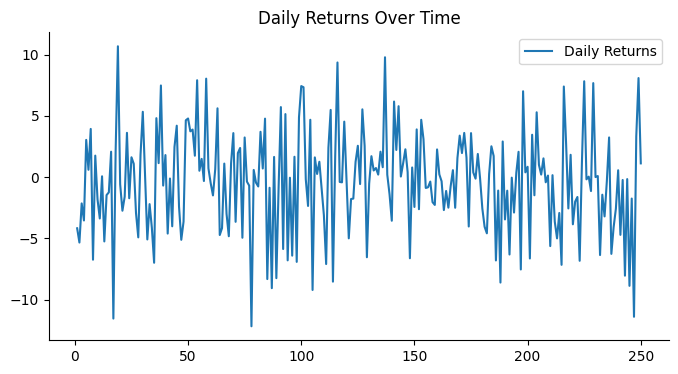

In [8]:
df.dropna(inplace=True)

fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(df['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')

# Calculating daily, monthly and annual volatility

In [9]:

daily_volatility = df['Return'].std()

monthly_volatility = math.sqrt(21) * daily_volatility

annual_volatility = math.sqrt(252) * daily_volatility

print(tabulate([['Tesla',daily_volatility,monthly_volatility,annual_volatility]],headers = ['Daily Volatility %', 'Monthly Volatility %', 'Annual Volatility %'],tablefmt = 'fancy_grid',stralign='center',numalign='center',floatfmt=".2f"))

╒═══════╤══════════════════════╤════════════════════════╤═══════════════════════╕
│       │  Daily Volatility %  │  Monthly Volatility %  │  Annual Volatility %  │
╞═══════╪══════════════════════╪════════════════════════╪═══════════════════════╡
│ Tesla │         4.12         │         18.86          │         65.33         │
╘═══════╧══════════════════════╧════════════════════════╧═══════════════════════╛


# Statistical Test | PART I.

#### Augmented Dickey-Fuller Test (ADF) / Test for stationarity

In [10]:
# Testing for stationarity in the df ('Returns' column)
# H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time
# H1: The time series is stationary

adfuller(df["Return"])

# Test statistic: -4.10658
# p-value: 0.00094
# Conlclusion: p-value < 0, so H0 is rejected. The returns are stationary

(-4.106586702076151,
 0.0009445273454100383,
 8,
 241,
 {'1%': -3.4577787098622674,
  '5%': -2.873608704758507,
  '10%': -2.573201765981991},
 1318.264829870127)

#### [CHECK AGAIN LATER!!!] / Jarque-Bera Test / Testing if the returns are normally distributed


In [11]:
# Why is it important? To see what distribution is best when fitting the GARCH models
# H0: The df follows a normal distribution
# H1: The df does not follow a normal distribution

# DOES NOT MAKE SENSE - returns not supposed to follow a normal distrubution but the test says so

#perform Jarque-Bera test
stats.jarque_bera(df["Return"])

# Null hypothesis is failed to be rejected
# The df seems to be following a normal distribution

Jarque_beraResult(statistic=0.9986487015255819, pvalue=0.6069406001625935)

# ACF & PACF 

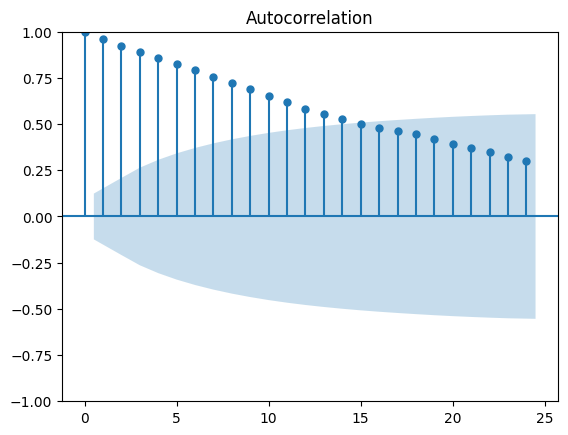

In [12]:
plot_acf(df['Adj Close']**2)
plt.show()

c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


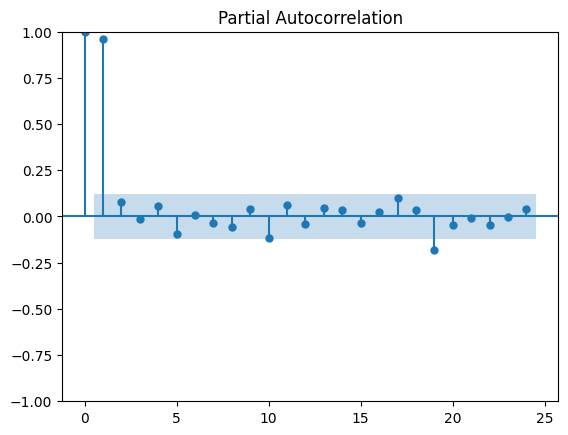

In [13]:
plot_pacf(df['Adj Close']**2)
plt.show()

# Normalizing our x values so that it fits the GJR - GARCH

In [14]:
# df['reg_output'] = (df['reg_output'] - np.min(df['reg_output']) + 1) / (np.max(df['reg_output']) - np.min(df['reg_output']) + 1)

# # min(x_normalized)

In [15]:
df['dummy'] = (df['reg_output'] < 0).astype(int)

In [16]:
df['reg_output_squared'] = df['reg_output']**2


In [17]:
df['Multiplication_dummy'] = df['reg_output_squared'] * df['dummy']

# Fitting a GARCH(1,1) model with normal distribution

In [18]:
garch_model = arch_model(df['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 1) # Q:What does horizon mean here?
print(gm_forecast.variance[-1:])              # A:The nr of steps ahead FC

mu         -0.364821
omega       0.768792
alpha[1]    0.020109
beta[1]     0.935147
Name: params, dtype: float64


           h.1
250  19.726717


In [19]:
gm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -707.531
Distribution:                  Normal   AIC:                           1423.06
Method:            Maximum Likelihood   BIC:                           1437.15
                                        No. Observations:                  250
Date:                Wed, Mar 15 2023   Df Residuals:                      249
Time:                        17:47:16   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3648      0.266     -1.373      0.170 [ -0.886,  0.156]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.7688      0.490      1.568      0.117      [ -0.192,  1.729]
alpha[1]       0.0201  2.653e-02      0.758      0.449 [-3.190e-02,7.211e-02]
beta[1]        0.9351  2.563e-02     36.486 1.839e-291      [  0.885,  0.985]
=============================================================================

Covariance estimator: robust
"""

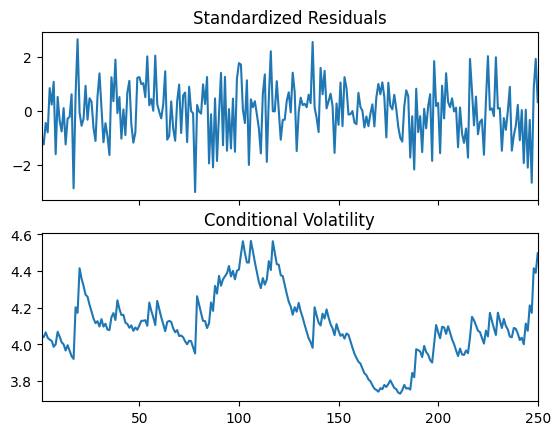

In [20]:
# Plot fitted results of GARCH (1,1)
gm_result.plot()
plt.show()

<Figure size 700x400 with 0 Axes>

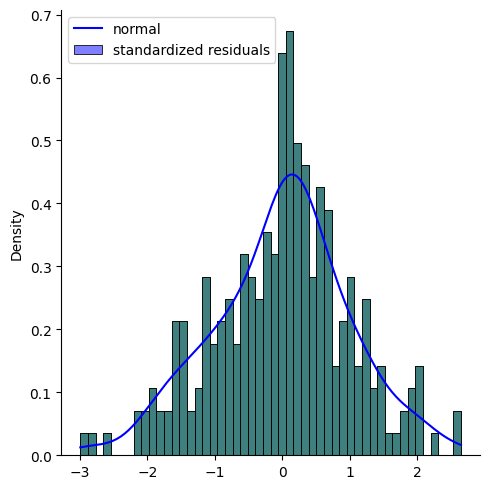

In [21]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid / gm_std

# Plot the histogram of the standardized residuals
plt.figure(figsize=(7,4))
sns.displot(gm_std_resid, kde=True, stat="density", bins=50, color='b')
sns.histplot(gm_std_resid, stat="density", bins=50, color='g', alpha=0.5)
plt.legend(('normal', 'standardized residuals'))
plt.show()

# Statistical Tests | PART II.

#### Ljung-Box Test on the residuals

In [22]:
# H0: The residuals are independently distributed
# H1: The residuals are not independently distributed; they exhibit serial correlation

sm.stats.acorr_ljungbox(gm_resid, lags=[25], return_df=True)

# p-value is less than 0.5, therefore the residuals exhibit serial correlation
# The GARCH(1,1) model is designed to capture the conditional heteroskedasticity 
#   in the df, and assuming that the model is correctly specified, the residuals 
#       should be independent and identically distributed. Any significant serial 
#           correlation in the residuals suggests that the model is not fully capturing 
#               the conditional heteroskedasticity or other patterns in the df

#NOTE: maybe we can try to adjust the number of lags

,lb_stat,lb_pvalue
25,41.003154,0.02294


#### Jarque-Bera Test on the residuals / Test for normality in the residuals

In [23]:
# H0: The residuals follows a normal distribution
# H1: The residuals does not follow a normal distribution

stats.jarque_bera(gm_resid)

# same as doing the tests for the returns (???)

Jarque_beraResult(statistic=0.9986487015255857, pvalue=0.6069406001625923)

# Fitting a GARCH(1,1) model with skewed t-distribution

In [24]:
# Specify GARCH model assumptions
skewt_gm = arch_model(df['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

# Fit the model
skewt_result = skewt_gm.fit(disp = 'off')

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

In [25]:
skewt_result.summary()
# AIC and BIC are higher than the GARCH (1,1) fitted with normal distribution

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                            Return   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -706.572
Distribution:      Standardized Skew Student's t   AIC:                           1425.14
Method:                       Maximum Likelihood   BIC:                           1446.27
                                                   No. Observations:                  250
Date:                           Wed, Mar 15 2023   Df Residuals:                      249
Time:                                   17:47:17   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3848      0.267     -1.441      0.150 [ -0.908,  0.139]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.6411      0.465      1.378      0.168      [ -0.271,  1.553]
alpha[1]       0.0276  2.775e-02      0.995      0.320 [-2.677e-02,8.199e-02]
beta[1]        0.9356  2.554e-02     36.634 8.221e-294      [  0.886,  0.986]
                               Distribution                               
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
eta           25.1696     38.910      0.647      0.518 [-51.092,1.014e+02]
lambda        -0.1027  6.573e-02     -1.563      0.118 [ -0.232,2.608e-02]
==========================================================================

Covariance estimator: robust
"""

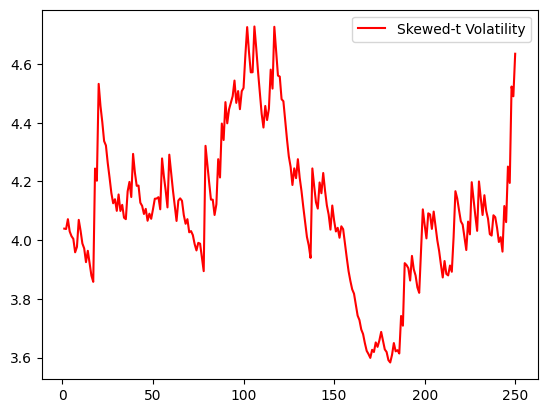

In [26]:
# Plot model fitting results
plt.plot(skewt_vol, color = 'red', label = 'Skewed-t Volatility')
plt.legend(loc = 'upper right')
plt.show()

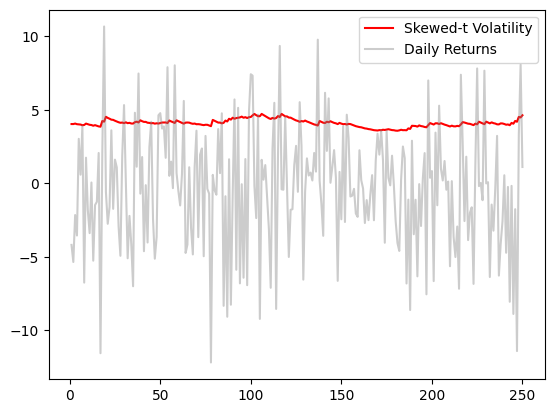

In [27]:
plt.plot(skewt_vol, color = 'red', label = 'Skewed-t Volatility')
plt.plot(df['Return'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

# When plotting the model together with the returns, it is clear the model does not perform well / also what the information criteria indicates

# Benchmark GARCH (1,1) with squared sentiment scores

In [28]:
benchmark = arch.arch_model(df['Return'], x=df['reg_output_squared'], mean='ARX', vol='GARCH', p=1, q=1)


In [29]:
benchmark = benchmark.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 950.8325860865382
Iteration:      2,   Func. Count:     16,   Neg. LLF: 757.5616679918667
Iteration:      3,   Func. Count:     24,   Neg. LLF: 731.386611846103
Iteration:      4,   Func. Count:     32,   Neg. LLF: 707.1051924488613
Iteration:      5,   Func. Count:     38,   Neg. LLF: 707.3905242902167
Iteration:      6,   Func. Count:     45,   Neg. LLF: 707.0503901048794
Iteration:      7,   Func. Count:     51,   Neg. LLF: 707.042682958958
Iteration:      8,   Func. Count:     57,   Neg. LLF: 707.0353741937711
Iteration:      9,   Func. Count:     63,   Neg. LLF: 707.0325948325222
Iteration:     10,   Func. Count:     69,   Neg. LLF: 707.0322751761184
Iteration:     11,   Func. Count:     75,   Neg. LLF: 707.0321686183244
Iteration:     12,   Func. Count:     81,   Neg. LLF: 707.0321149503732
Iteration:     13,   Func. Count:     87,   Neg. LLF: 707.0318684059293
Iteration:     14,   Func. Count:     93,   Neg. LLF: 707.03168328

In [30]:
print(benchmark.summary())

                          AR-X - GARCH Model Results                          
Dep. Variable:                 Return   R-squared:                       0.004
Mean Model:                      AR-X   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -707.032
Distribution:                  Normal   AIC:                           1424.06
Method:            Maximum Likelihood   BIC:                           1441.67
                                        No. Observations:                  250
Date:                Wed, Mar 15 2023   Df Residuals:                      248
Time:                        17:47:18   Df Model:                            2
                                   Mean Model                                   
                         coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------------------------------------------
Const                 -0.2100      0.295     -

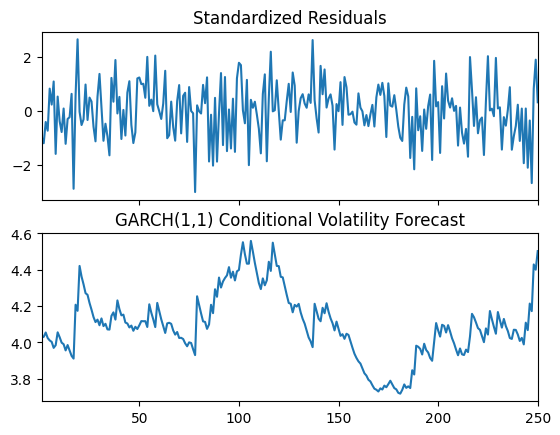

In [31]:
# Plot the conditional volatility forecast
fig = benchmark.plot()
plt.title("GARCH(1,1) Conditional Volatility Forecast")
plt.show()

In [32]:
# Print the p-values of the estimated parameters
benchmark.pvalues.round(5)

Const                 0.47601
reg_output_squared    0.18263
omega                 0.11823
alpha[1]              0.46421
beta[1]               0.00000
Name: pvalues, dtype: float64

In [33]:
cond_vol = benchmark.conditional_volatility

In [34]:
cond_vol

1      4.027943
2      4.030871
3      4.055007
4      4.024469
5      4.011266
         ...   
246    4.214123
247    4.172795
248    4.429678
249    4.400622
250    4.503109
Name: cond_vol, Length: 250, dtype: float64

# Egarch ARX (1,1)

In [35]:
print(df['reg_output_squared'])

1      0.010240
2      0.047605
3      0.041743
4      0.061912
5      0.003369
         ...   
246    0.000103
247    0.000101
248    0.012115
249    0.000282
250    0.010758
Name: reg_output_squared, Length: 250, dtype: float64


In [36]:
egarch_arx = arch_model(df['Return'], mean='ARX', lags=1, vol='EGARCH', p=1, q=1, x=df['reg_output_squared'])

In [37]:
egarch_arx =  egarch_arx.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2289.2477612836465
Iteration:      2,   Func. Count:     19,   Neg. LLF: 786939270.0567143
Iteration:      3,   Func. Count:     29,   Neg. LLF: 705.8031948953419
Iteration:      4,   Func. Count:     37,   Neg. LLF: 706.0563629578396
Iteration:      5,   Func. Count:     45,   Neg. LLF: 705.6991411281801
Iteration:      6,   Func. Count:     53,   Neg. LLF: 708.154140946398
Iteration:      7,   Func. Count:     61,   Neg. LLF: 705.6518340232822
Iteration:      8,   Func. Count:     69,   Neg. LLF: 704.1809484948963
Iteration:      9,   Func. Count:     77,   Neg. LLF: 704.0835747015076
Iteration:     10,   Func. Count:     85,   Neg. LLF: 703.9833406508421
Iteration:     11,   Func. Count:     92,   Neg. LLF: 703.976561317844
Iteration:     12,   Func. Count:     99,   Neg. LLF: 703.9745120283435
Iteration:     13,   Func. Count:    106,   Neg. LLF: 703.974232248955
Iteration:     14,   Func. Count:    113,   Neg. LLF: 703.97382051

In [38]:
print(egarch_arx.summary)

<bound method ARCHModelResult.summary of                          AR-X - EGARCH Model Results                          
Dep. Variable:                 Return   R-squared:                       0.006
Mean Model:                      AR-X   Adj. R-squared:                 -0.002
Vol Model:                     EGARCH   Log-Likelihood:               -703.974
Distribution:                  Normal   AIC:                           1419.95
Method:            Maximum Likelihood   BIC:                           1441.05
                                        No. Observations:                  249
Date:                Wed, Mar 15 2023   Df Residuals:                      246
Time:                        17:47:18   Df Model:                            3
                                    Mean Model                                    
                         coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------------------------------------------------

In [39]:
egarch_arx.pvalues.round(5)

Const                 0.40726
Return[1]             0.61982
reg_output_squared    0.23279
omega                 0.09558
alpha[1]              0.39259
beta[1]               0.00000
Name: pvalues, dtype: float64

# Combined EGARCH (1,1) ARX Model

In [40]:
combined_egarch_arx = arch_model(df['Return'], mean='ARX', lags=1, vol='EGARCH', p=1, q=1, x=df[['reg_output_squared', 'Multiplication_dummy']])

In [41]:
combined_egarch_arx = combined_egarch_arx.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 2288.8417179726166
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1219.3148241249019
Iteration:      3,   Func. Count:     31,   Neg. LLF: 698829196.344958
Iteration:      4,   Func. Count:     41,   Neg. LLF: 978.6973763405203
Iteration:      5,   Func. Count:     52,   Neg. LLF: 703.5117569058705
Iteration:      6,   Func. Count:     60,   Neg. LLF: 705.9320345343837
Iteration:      7,   Func. Count:     69,   Neg. LLF: 703.485882099775
Iteration:      8,   Func. Count:     77,   Neg. LLF: 703.4820381223979
Iteration:      9,   Func. Count:     85,   Neg. LLF: 703.4785125982984
Iteration:     10,   Func. Count:     93,   Neg. LLF: 703.482067477088
Iteration:     11,   Func. Count:    102,   Neg. LLF: 703.4928742344489
Iteration:     12,   Func. Count:    113,   Neg. LLF: 703.475411375535
Iteration:     13,   Func. Count:    121,   Neg. LLF: 703.4751579894262
Iteration:     14,   Func. Count:    129,   Neg. LLF: 703.47517525

In [42]:
print(combined_egarch_arx.summary)

<bound method ARCHModelResult.summary of                          AR-X - EGARCH Model Results                          
Dep. Variable:                 Return   R-squared:                       0.009
Mean Model:                      AR-X   Adj. R-squared:                 -0.003
Vol Model:                     EGARCH   Log-Likelihood:               -703.475
Distribution:                  Normal   AIC:                           1420.95
Method:            Maximum Likelihood   BIC:                           1445.57
                                        No. Observations:                  249
Date:                Wed, Mar 15 2023   Df Residuals:                      245
Time:                        17:47:19   Df Model:                            4
                                       Mean Model                                       
                           coef    std err          t      P>|t|        95.0% Conf. Int.
----------------------------------------------------------------------

In [43]:
combined_egarch_arx.pvalues.round(5)

Const                   0.00000
Return[1]               0.00868
reg_output_squared      0.00000
Multiplication_dummy    0.00000
omega                   0.09437
alpha[1]                0.31000
beta[1]                 0.00000
Name: pvalues, dtype: float64

# GJR Garch ARX (1,1)

In [53]:
GJR = arch_model(df['Return'], mean='ARX', lags=1, vol='GARCH', p=4, q=4, o=4, x=df[['reg_output_squared', 'Multiplication_dummy']])

In [54]:
GJR = GJR.fit()

Iteration:      1,   Func. Count:     19,   Neg. LLF: 13005.41149289482
Iteration:      2,   Func. Count:     39,   Neg. LLF: 2160.143706893612
Iteration:      3,   Func. Count:     59,   Neg. LLF: 769.0216054793237
Iteration:      4,   Func. Count:     79,   Neg. LLF: 916.5944447798001
Iteration:      5,   Func. Count:     99,   Neg. LLF: 968.2045320977932
Iteration:      6,   Func. Count:    119,   Neg. LLF: 694.4275792502697
Iteration:      7,   Func. Count:    137,   Neg. LLF: 695.1009484224276
Iteration:      8,   Func. Count:    156,   Neg. LLF: 696.1493160651257
Iteration:      9,   Func. Count:    175,   Neg. LLF: 693.1110905034351
Iteration:     10,   Func. Count:    193,   Neg. LLF: 693.7863146772355
Iteration:     11,   Func. Count:    212,   Neg. LLF: 693.7765475347569
Iteration:     12,   Func. Count:    231,   Neg. LLF: 693.0264784333729
Iteration:     13,   Func. Count:    250,   Neg. LLF: 692.6433045657648
Iteration:     14,   Func. Count:    268,   Neg. LLF: 692.636315

In [55]:
print(GJR.summary)

<bound method ARCHModelResult.summary of                         AR-X - GJR-GARCH Model Results                        
Dep. Variable:                 Return   R-squared:                       0.007
Mean Model:                      AR-X   Adj. R-squared:                 -0.006
Vol Model:                  GJR-GARCH   Log-Likelihood:               -692.267
Distribution:                  Normal   AIC:                           1418.53
Method:            Maximum Likelihood   BIC:                           1478.33
                                        No. Observations:                  249
Date:                Wed, Mar 15 2023   Df Residuals:                      245
Time:                        17:48:25   Df Model:                            4
                                       Mean Model                                      
                           coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------

In [56]:
GJR.pvalues.round(5)

Const                   0.89759
Return[1]               0.97102
reg_output_squared      0.99981
Multiplication_dummy    0.99534
omega                   0.96801
alpha[1]                1.00000
alpha[2]                1.00000
alpha[3]                1.00000
alpha[4]                0.99438
gamma[1]                1.00000
gamma[2]                0.91484
gamma[3]                1.00000
gamma[4]                0.99413
beta[1]                 0.95543
beta[2]                 1.00000
beta[3]                 1.00000
beta[4]                 0.76929
Name: pvalues, dtype: float64

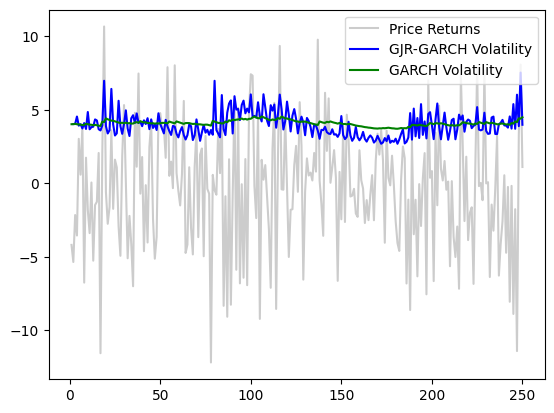

In [57]:
gjrgm_vol = GJR.conditional_volatility
benchmark = cond_vol

# Plot the actual stock returns
plt.plot(df['Return'], color = 'grey', alpha = 0.4, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'blue', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(benchmark, color = 'green', label = 'GARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

# Model Selection GJR 

In [49]:
#Model Selection GJR - Lowest AIC
import itertools
import numpy as np
import pandas as pd
from arch import arch_model

# Define the range of p, q, and o to search over
p = range(1, 4)
q = range(1, 4)
o = range(1, 4)

# Create all combinations of p, q, and o
pqo = list(itertools.product(p, q, o))

# Define the exogenous variables
exog_vars = ['reg_output_squared', 'Multiplication_dummy']

# Initialize the AIC and best model variables
best_aic = np.inf
best_model = None

# Loop over all combinations of p, q, and o
for i, (p, q, o) in enumerate(pqo):
    print(f"Fitting model {i+1} of {len(pqo)}: (p={p}, q={q}, o={o})")
    try:
        # Fit the ARX-GARCH model
        model = arch_model(df['Return'], mean='ARX', lags=1, vol='GARCH', p=p, q=q, o=o, x=df[exog_vars])
        res = model.fit(disp='off')
        
        # Compute the AIC and update the best model if necessary
        aic = res.aic
        if aic < best_aic:
            best_aic = aic
            best_model = res
            print(f"New best model: (p={p}, q={q}, o={o}), AIC={aic:.2f}")
    except:
        continue

print("Done!")

Fitting model 1 of 27: (p=1, q=1, o=1)
New best model: (p=1, q=1, o=1), AIC=1415.52
Fitting model 2 of 27: (p=1, q=1, o=2)
New best model: (p=1, q=1, o=2), AIC=1408.77
Fitting model 3 of 27: (p=1, q=1, o=3)
Fitting model 4 of 27: (p=1, q=2, o=1)
Fitting model 5 of 27: (p=1, q=2, o=2)
Fitting model 6 of 27: (p=1, q=2, o=3)
Fitting model 7 of 27: (p=1, q=3, o=1)
Fitting model 8 of 27: (p=1, q=3, o=2)
New best model: (p=1, q=3, o=2), AIC=1408.38
Fitting model 9 of 27: (p=1, q=3, o=3)
Fitting model 10 of 27: (p=2, q=1, o=1)
Fitting model 11 of 27: (p=2, q=1, o=2)
Fitting model 12 of 27: (p=2, q=1, o=3)
Fitting model 13 of 27: (p=2, q=2, o=1)
Fitting model 14 of 27: (p=2, q=2, o=2)
Fitting model 15 of 27: (p=2, q=2, o=3)
Fitting model 16 of 27: (p=2, q=3, o=1)
Fitting model 17 of 27: (p=2, q=3, o=2)
Fitting model 18 of 27: (p=2, q=3, o=3)
Fitting model 19 of 27: (p=3, q=1, o=1)
Fitting model 20 of 27: (p=3, q=1, o=2)
Fitting model 21 of 27: (p=3, q=1, o=3)
Fitting model 22 of 27: (p=3, q=2,

In [50]:
import itertools
import numpy as np
import pandas as pd
from arch import arch_model

# Define the range of p, q, and o to search over
p = range(1, 4)
q = range(1, 4)
o = range(1, 4)

# Create all combinations of p, q, and o
pqo = list(itertools.product(p, q, o))

# Define the exogenous variables
exog_vars = ['reg_output_squared', 'Multiplication_dummy']

# Initialize the BIC and best model variables
best_BIC = np.inf
best_model = None

# Loop over all combinations of p, q, and o
for i, (p, q, o) in enumerate(pqo):
    print(f"Fitting model {i+1} of {len(pqo)}: (p={p}, q={q}, o={o})")
    try:
        # Fit the ARX-GARCH model
        model = arch_model(df['Return'], mean='ARX', lags=1, vol='GARCH', p=p, q=q, o=o, x=df[exog_vars])
        res = model.fit(disp='off')
        
        # Compute the BIC and update the best model if necessary
        bic = res.bic
        if bic < best_bic:
            best_bic = bic
            best_model = res
            print(f"New best model: (p={p}, q={q}, o={o}), BIC={bic:.2f}")
    except:
        continue

print("Done!")

Fitting model 1 of 27: (p=1, q=1, o=1)
Fitting model 2 of 27: (p=1, q=1, o=2)
Fitting model 3 of 27: (p=1, q=1, o=3)
Fitting model 4 of 27: (p=1, q=2, o=1)
Fitting model 5 of 27: (p=1, q=2, o=2)
Fitting model 6 of 27: (p=1, q=2, o=3)
Fitting model 7 of 27: (p=1, q=3, o=1)
Fitting model 8 of 27: (p=1, q=3, o=2)
Fitting model 9 of 27: (p=1, q=3, o=3)
Fitting model 10 of 27: (p=2, q=1, o=1)
Fitting model 11 of 27: (p=2, q=1, o=2)
Fitting model 12 of 27: (p=2, q=1, o=3)
Fitting model 13 of 27: (p=2, q=2, o=1)
Fitting model 14 of 27: (p=2, q=2, o=2)
Fitting model 15 of 27: (p=2, q=2, o=3)
Fitting model 16 of 27: (p=2, q=3, o=1)
Fitting model 17 of 27: (p=2, q=3, o=2)
Fitting model 18 of 27: (p=2, q=3, o=3)
Fitting model 19 of 27: (p=3, q=1, o=1)
Fitting model 20 of 27: (p=3, q=1, o=2)
Fitting model 21 of 27: (p=3, q=1, o=3)
Fitting model 22 of 27: (p=3, q=2, o=1)
Fitting model 23 of 27: (p=3, q=2, o=2)
Fitting model 24 of 27: (p=3, q=2, o=3)
Fitting model 25 of 27: (p=3, q=3, o=1)
Fitting m

In [51]:
#Model Selection GJR - Lowest Log-Likelihood
import itertools
import numpy as np
import pandas as pd
from arch import arch_model

# Define the range of p, q, and o to search over
p = range(1, 5)
q = range(1, 5)
o = range(1, 5)

# Create all combinations of p, q, and o
pqo = list(itertools.product(p, q, o))

# Define the exogenous variables
exog_vars = ['reg_output_squared', 'Multiplication_dummy']

# Initialize the log-likelihood and best model variables
best_loglik = -np.inf
best_model = None

# Loop over all combinations of p, q, and o
for i, (p, q, o) in enumerate(pqo):
    print(f"Fitting model {i+1} of {len(pqo)}: (p={p}, q={q}, o={o})")
    try:
        # Fit the ARX-GARCH model
        model = arch_model(df['Return'], mean='ARX', lags=1, vol='GARCH', p=p, q=q, o=o, x=df[exog_vars])
        res = model.fit(disp='off')
        
        # Compute the log-likelihood and update the best model if necessary
        loglik = res.loglikelihood
        if loglik > best_loglik:
            best_loglik = loglik
            best_model = res
            print(f"New best model: (p={p}, q={q}, o={o}), log-likelihood={loglik:.2f}")
    except:
        continue

print("Done!")


Fitting model 1 of 64: (p=1, q=1, o=1)
New best model: (p=1, q=1, o=1), log-likelihood=-699.76
Fitting model 2 of 64: (p=1, q=1, o=2)
New best model: (p=1, q=1, o=2), log-likelihood=-695.38
Fitting model 3 of 64: (p=1, q=1, o=3)
New best model: (p=1, q=1, o=3), log-likelihood=-695.38
Fitting model 4 of 64: (p=1, q=1, o=4)
New best model: (p=1, q=1, o=4), log-likelihood=-694.97
Fitting model 5 of 64: (p=1, q=2, o=1)
Fitting model 6 of 64: (p=1, q=2, o=2)
New best model: (p=1, q=2, o=2), log-likelihood=-694.54
Fitting model 7 of 64: (p=1, q=2, o=3)
New best model: (p=1, q=2, o=3), log-likelihood=-694.54
Fitting model 8 of 64: (p=1, q=2, o=4)
New best model: (p=1, q=2, o=4), log-likelihood=-694.44
Fitting model 9 of 64: (p=1, q=3, o=1)
Fitting model 10 of 64: (p=1, q=3, o=2)
New best model: (p=1, q=3, o=2), log-likelihood=-693.19
Fitting model 11 of 64: (p=1, q=3, o=3)
New best model: (p=1, q=3, o=3), log-likelihood=-693.19
Fitting model 12 of 64: (p=1, q=3, o=4)
Fitting model 13 of 64: (

# Pyflux EGARCH

In [52]:
new_combined_egarch = model = pf.EGARCH(df=df, formula='Return~1+reg_output+sentiment', p=1, q=1, o=1)
#could not install pyflux on my pc

NameError: name 'pf' is not defined

# [NOT USED] Rolling Predictions


In [ ]:
# training df size = 200 (80%)
# test df size = 50 (20%)

In [ ]:
rolling_predictions = []
test_size = 50

for i in range(test_size):
    train = df['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1) #could the horizen be the number of periods we want to FC
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=df['Return'].index[-50:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

In [ ]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(df['Return'][-50:])
plt.plot(rolling_predictions)
plt.title('Tesla Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

# [NOT USED] Fitting the rolling prediction model and relevant statistics

In [ ]:
model_fit.summary()